## 0. raw
### 0.0. Simple model 
- 0.0.0. window size = 5
- 0.0.1. window size = 10
- 0.0.2. window size = 30
- 0.0.3. added window size = 7

### 0.1. Enhanced model
- 0.1.0 Reduced batch size
- 0.1.1 Layer added

In [87]:
## 0. raw

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import FinanceDataReader as fdr

In [2]:
df=pd.read_csv('carbon.csv', index_col='Date')
df.head(2)

,euro,bcoin,euro_stox,german,uk,french,chino,india,brasil,corea,...,v_corea,v_states,v_copper,v_lumber,v_cattle,v_v_corn,v_wheat,v_crude,v_n_gas,v_carbon
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,1.1934,274.8,3023.14,9473.16,6417.16,4111.36,3350.52,8378.40,47517.0,1915.75,...,313440000.0,116160000.0,330.0,190.0,16540.0,140390.0,45080.0,0.0,141780.0,90.0
2015-01-06,1.1889,282.3,3007.91,9469.66,6366.51,4083.50,3351.45,8127.35,48001.0,1882.45,...,303690000.0,101870000.0,310.0,200.0,31200.0,138310.0,52460.0,0.0,111340.0,590.0


In [ ]:
# ### 0.0. Simple model 

In [ ]:
# - 0.0.0. window size = 5

In [60]:
def split_xy5(dataset, time_steps):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        
        if x_end_number > len(dataset)-1:
            break
        tmp_x = dataset.iloc[i:x_end_number, :]
        tmp_y = dataset.iloc[x_end_number, 18]
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

x, y = split_xy5(df, 5)

print(x[0,:], y[0])
print(x.shape, y.shape)

[[1.193400e+00 2.748000e+02 3.023140e+03 9.473160e+03 6.417160e+03
  4.111360e+03 3.350520e+03 8.378400e+03 4.751700e+04 1.915750e+03
  1.750165e+04 2.793000e+00 3.290000e+02 1.662200e+02 4.060000e+02
  5.890000e+02 4.991000e+01 2.882000e+00 6.900000e+00 0.000000e+00
  5.499000e+04 7.746000e+07 1.055400e+08 7.505200e+08 1.378900e+08
  5.314000e+10 1.181600e+08 3.870000e+06 3.134400e+08 1.161600e+08
  3.300000e+02 1.900000e+02 1.654000e+04 1.403900e+05 4.508000e+04
  0.000000e+00 1.417800e+05 9.000000e+01]
 [1.188900e+00 2.823000e+02 3.007910e+03 9.469660e+03 6.366510e+03
  4.083500e+03 3.351450e+03 8.127350e+03 4.800100e+04 1.882450e+03
  1.737164e+04 2.804000e+00 3.197000e+02 1.660300e+02 4.050000e+02
  5.917500e+02 4.803000e+01 2.938000e+00 6.770000e+00 0.000000e+00
  2.194000e+04 6.702000e+07 9.681000e+07 7.932600e+08 1.308100e+08
  5.017000e+10 1.728000e+08 4.560000e+06 3.036900e+08 1.018700e+08
  3.100000e+02 2.000000e+02 3.120000e+04 1.383100e+05 5.246000e+04
  0.000000e+00 1.113

In [61]:
tt_split = int(len(x)*0.9)
x_train= x[:tt_split]
y_train= y[:tt_split]

x_test = x[tt_split:]
y_test = y[tt_split:]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1638, 5, 38) (1638,) (182, 5, 38) (182,)


In [62]:
x_train2d = np.reshape(x_train, (-1, x.shape[1]*x.shape[2]))
x_test2d = np.reshape(x_test, (-1, x.shape[1]*x.shape[2]))
x_2d = np.reshape(x,(-1, x.shape[1]*x.shape[2]))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train2d)
x_train2d_scaled = scaler.transform(x_train2d)
x_test2d_scaled = scaler.transform(x_test2d)
x_2d_scaled = scaler.transform(x_2d)

x_train3d = x_train2d_scaled.reshape(-1, x.shape[1], x.shape[2]) 
x_test3d = x_test2d_scaled.reshape(-1, x.shape[1], x.shape[2])  
x_3d = x_2d_scaled.reshape(-1, x.shape[1], x.shape[2]) 
print(x_train3d[0,:])

[[ 1.30447111e+00 -6.67895360e-01 -1.27328223e+00 -1.92209152e+00
  -8.16697045e-01 -2.02938380e+00  4.61892611e-01 -9.64462179e-01
  -1.31152805e+00 -1.04274709e+00 -1.25792917e+00  6.13160115e-02
  -4.78827375e-01  2.99279052e+00  6.67186977e-01  1.57841888e+00
   9.05882555e-04  4.55462542e-01 -8.56156222e-01  0.00000000e+00
  -3.44695454e-01  1.60755106e+00  3.00365957e-01 -2.29957922e-01
   9.62413461e-01  2.35355297e+00 -9.96633553e-01 -4.46389996e-01
  -6.76948397e-01 -1.05365569e+00 -1.65365837e-01 -7.20815731e-01
   2.31176107e-01  5.29424342e-03 -1.87567648e-01  0.00000000e+00
  -2.31110387e-02 -4.98253833e-01]
 [ 1.20444876e+00 -6.64855953e-01 -1.33189044e+00 -1.92544460e+00
  -9.06104459e-01 -2.08947034e+00  4.64193870e-01 -1.10539835e+00
  -1.29144767e+00 -1.16246057e+00 -1.28800711e+00  8.48823094e-02
  -5.33606188e-01  2.99051613e+00  6.38003801e-01  1.62097657e+00
  -1.44066796e-01  5.69051492e-01 -8.69304874e-01  0.00000000e+00
  -3.69918943e-01  1.07107970e+00  5.4452

In [63]:
from keras.models import Sequential, Input
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, 
               input_shape=(x_3d.shape[1], x_3d.shape[2])))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 5, 128)            85504     
_________________________________________________________________
lstm_46 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
lstm_47 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
lstm_48 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
lstm_49 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
lstm_50 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_16 (Dense)             (None, 32)               

In [64]:
epoch = 100
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),\
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(x_train3d, y_train, verbose=1,
         batch_size = 20, epochs = epoch, validation_split=0.11, callbacks= callbacks)

model = keras.models.load_model('best_model.h5')
score_train = model.evaluate(x_train3d, y_train, verbose=0)
score_test = model.evaluate(x_test3d, y_test, verbose=0)
print('train_score')                    
print("%.2f%%" % (score_train[1]*100))
print('test_score')
print("%.2f%%" % (score_test[1]*100))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print('min_loss_values:', np.min(loss_values))
print('min_loss_values_val:', np.min(val_loss_values))

Epoch 1/100
73/73 [==============================] - 8s 43ms/step - loss: 315.0946 - accuracy: 0.0000e+00 - val_loss: 150.5027 - val_accuracy: 0.0000e+00
Epoch 2/100
73/73 [==============================] - 3s 35ms/step - loss: 20.6721 - accuracy: 0.0000e+00 - val_loss: 88.4871 - val_accuracy: 0.0000e+00
Epoch 3/100
73/73 [==============================] - 3s 37ms/step - loss: 3.9803 - accuracy: 0.0000e+00 - val_loss: 41.7971 - val_accuracy: 0.0000e+00
Epoch 4/100
73/73 [==============================] - 3s 38ms/step - loss: 2.5241 - accuracy: 0.0000e+00 - val_loss: 31.3564 - val_accuracy: 0.0000e+00
Epoch 5/100
73/73 [==============================] - 2s 31ms/step - loss: 1.9755 - accuracy: 0.0000e+00 - val_loss: 38.6692 - val_accuracy: 0.0000e+00
Epoch 6/100
73/73 [==============================] - 3s 40ms/step - loss: 1.5055 - accuracy: 0.0000e+00 - val_loss: 21.0425 - val_accuracy: 0.0000e+00
Epoch 7/100
73/73 [==============================] - 3s 45ms/step - loss: 1.5107 - accurac

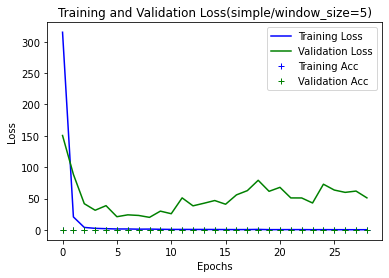

In [65]:
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(simple/window_size=5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

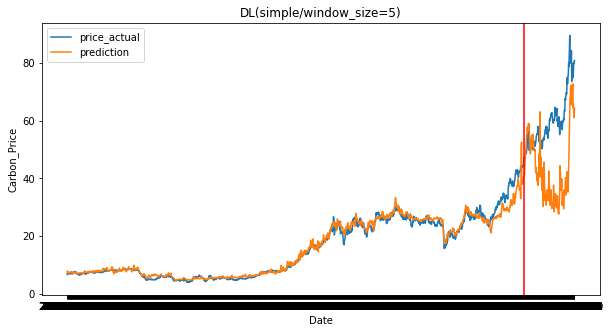

In [66]:
x_pred = model.predict(x_3d)
df_x_pred = pd.DataFrame(x_pred, index = df.index[5:])
df_y = pd.DataFrame(y, index=df.index[5:])
plt.figure(figsize = (10,5))

plt.plot(df_y, label = 'price_actual')
plt.plot(df_x_pred, label = 'prediction')
plt.axvline(df_x_pred.index[x_train.shape[0]], color = 'red', ls='-')

plt.title('DL(simple/window_size=5)')

plt.xlabel('Date')
plt.ylabel('Carbon_Price')

plt.legend()
plt.show()

In [ ]:
# - 0.0.1. window size = 10

In [67]:
def split_xy5(dataset, time_steps):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        
        if x_end_number > len(dataset)-1:
            break
        tmp_x = dataset.iloc[i:x_end_number, :]
        tmp_y = dataset.iloc[x_end_number, 18]
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

x, y = split_xy5(df, 10)

print(x[0,:], y[0])
print(x.shape, y.shape)

[[1.193400e+00 2.748000e+02 3.023140e+03 9.473160e+03 6.417160e+03
  4.111360e+03 3.350520e+03 8.378400e+03 4.751700e+04 1.915750e+03
  1.750165e+04 2.793000e+00 3.290000e+02 1.662200e+02 4.060000e+02
  5.890000e+02 4.991000e+01 2.882000e+00 6.900000e+00 0.000000e+00
  5.499000e+04 7.746000e+07 1.055400e+08 7.505200e+08 1.378900e+08
  5.314000e+10 1.181600e+08 3.870000e+06 3.134400e+08 1.161600e+08
  3.300000e+02 1.900000e+02 1.654000e+04 1.403900e+05 4.508000e+04
  0.000000e+00 1.417800e+05 9.000000e+01]
 [1.188900e+00 2.823000e+02 3.007910e+03 9.469660e+03 6.366510e+03
  4.083500e+03 3.351450e+03 8.127350e+03 4.800100e+04 1.882450e+03
  1.737164e+04 2.804000e+00 3.197000e+02 1.660300e+02 4.050000e+02
  5.917500e+02 4.803000e+01 2.938000e+00 6.770000e+00 0.000000e+00
  2.194000e+04 6.702000e+07 9.681000e+07 7.932600e+08 1.308100e+08
  5.017000e+10 1.728000e+08 4.560000e+06 3.036900e+08 1.018700e+08
  3.100000e+02 2.000000e+02 3.120000e+04 1.383100e+05 5.246000e+04
  0.000000e+00 1.113

In [68]:
tt_split = int(len(x)*0.9)
x_train= x[:tt_split]
y_train= y[:tt_split]

x_test = x[tt_split:]
y_test = y[tt_split:]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1633, 10, 38) (1633,) (182, 10, 38) (182,)


In [69]:
x_train2d = np.reshape(x_train, (-1, x.shape[1]*x.shape[2]))
x_test2d = np.reshape(x_test, (-1, x.shape[1]*x.shape[2]))
x_2d = np.reshape(x,(-1, x.shape[1]*x.shape[2]))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train2d)
x_train2d_scaled = scaler.transform(x_train2d)
x_test2d_scaled = scaler.transform(x_test2d)
x_2d_scaled = scaler.transform(x_2d)

x_train3d = x_train2d_scaled.reshape(-1, x.shape[1], x.shape[2]) 
x_test3d = x_test2d_scaled.reshape(-1, x.shape[1], x.shape[2])  
x_3d = x_2d_scaled.reshape(-1, x.shape[1], x.shape[2]) 
print(x_train3d[0,:])

[[ 1.30978544e+00 -6.80349053e-01 -1.27495866e+00 -1.93328409e+00
  -8.15286743e-01 -2.03591520e+00  4.63564563e-01 -9.64748685e-01
  -1.31066024e+00 -1.04996142e+00 -1.26003252e+00  7.16608951e-02
  -4.79337892e-01  2.98909706e+00  7.02797018e-01  1.59653734e+00
   3.38363357e-03  4.54251899e-01 -8.56571829e-01  0.00000000e+00
  -3.45188165e-01  1.60496828e+00  2.97451701e-01 -2.31698957e-01
   9.59433966e-01  2.35188726e+00 -9.93666612e-01 -4.43078965e-01
  -6.77639525e-01 -1.05120069e+00 -1.61777442e-01 -7.21828261e-01
   2.29011658e-01  8.47605509e-03 -1.83673060e-01  0.00000000e+00
  -2.32165802e-02 -4.94838513e-01]
 [ 1.20984555e+00 -6.77596367e-01 -1.33402322e+00 -1.93670321e+00
  -9.04521278e-01 -2.09671057e+00  4.65689109e-01 -1.10663907e+00
  -1.29058513e+00 -1.17195632e+00 -1.29046496e+00  9.57296890e-02
  -5.36501803e-01  2.98667384e+00  6.72854671e-01  1.64061388e+00
  -1.41369528e-01  5.67830129e-01 -8.69881643e-01  0.00000000e+00
  -3.70370650e-01  1.06816920e+00  5.1459

In [70]:
from keras.models import Sequential, Input
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, 
               input_shape=(x_3d.shape[1], x_3d.shape[2])))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 10, 128)           85504     
_________________________________________________________________
lstm_52 (LSTM)               (None, 10, 128)           131584    
_________________________________________________________________
lstm_53 (LSTM)               (None, 10, 128)           131584    
_________________________________________________________________
lstm_54 (LSTM)               (None, 10, 128)           131584    
_________________________________________________________________
lstm_55 (LSTM)               (None, 10, 128)           131584    
_________________________________________________________________
lstm_56 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_18 (Dense)             (None, 32)               

In [71]:
epoch = 100
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),\
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(x_train3d, y_train, verbose=1,
         batch_size = 20, epochs = epoch, validation_split=0.11, callbacks= callbacks)

model = keras.models.load_model('best_model.h5')
score_train = model.evaluate(x_train3d, y_train, verbose=0)
score_test = model.evaluate(x_test3d, y_test, verbose=0)
print('train_score')                    
print("%.2f%%" % (score_train[1]*100))
print('test_score')
print("%.2f%%" % (score_test[1]*100))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print('min_loss_values:', np.min(loss_values))
print('min_loss_values_val:', np.min(val_loss_values))

Epoch 1/100
73/73 [==============================] - 13s 85ms/step - loss: 154.2279 - accuracy: 0.0000e+00 - val_loss: 230.9113 - val_accuracy: 0.0000e+00
Epoch 2/100
73/73 [==============================] - 4s 59ms/step - loss: 4.5372 - accuracy: 0.0000e+00 - val_loss: 127.1264 - val_accuracy: 0.0000e+00
Epoch 3/100
73/73 [==============================] - 4s 58ms/step - loss: 2.7787 - accuracy: 0.0000e+00 - val_loss: 42.8255 - val_accuracy: 0.0000e+00
Epoch 4/100
73/73 [==============================] - 5s 63ms/step - loss: 2.1659 - accuracy: 0.0000e+00 - val_loss: 40.3701 - val_accuracy: 0.0000e+00
Epoch 5/100
73/73 [==============================] - 5s 64ms/step - loss: 1.5797 - accuracy: 0.0000e+00 - val_loss: 48.8437 - val_accuracy: 0.0000e+00
Epoch 6/100
73/73 [==============================] - 5s 63ms/step - loss: 1.2220 - accuracy: 0.0000e+00 - val_loss: 50.9534 - val_accuracy: 0.0000e+00
Epoch 7/100
73/73 [==============================] - 5s 70ms/step - loss: 1.3308 - accura

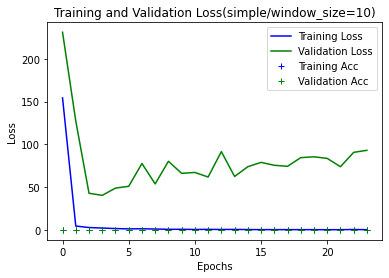

In [72]:
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(simple/window_size=10)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

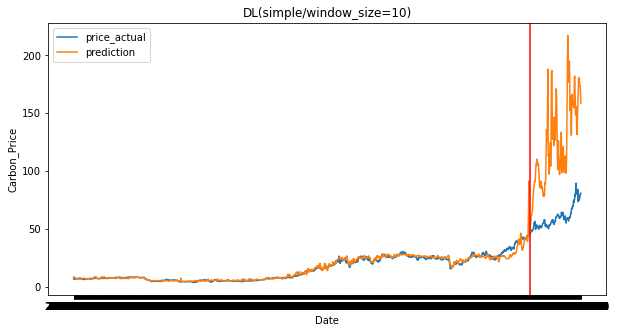

In [73]:
x_pred = model.predict(x_3d)
df_x_pred = pd.DataFrame(x_pred, index = df.index[10:])
df_y = pd.DataFrame(y, index=df.index[10:])
plt.figure(figsize = (10,5))

plt.plot(df_y, label = 'price_actual')
plt.plot(df_x_pred, label = 'prediction')
plt.axvline(df_x_pred.index[x_train.shape[0]], color = 'red', ls='-')

plt.title('DL(simple/window_size=10)')

plt.xlabel('Date')
plt.ylabel('Carbon_Price')

plt.legend()
plt.show()

In [ ]:
# - 0.0.2. window size = 30

In [74]:
def split_xy5(dataset, time_steps):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        
        if x_end_number > len(dataset)-1:
            break
        tmp_x = dataset.iloc[i:x_end_number, :]
        tmp_y = dataset.iloc[x_end_number, 18]
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

x, y = split_xy5(df, 30)

print(x[0,:], y[0])
print(x.shape, y.shape)

[[1.19340e+00 2.74800e+02 3.02314e+03 ... 0.00000e+00 1.41780e+05
  9.00000e+01]
 [1.18890e+00 2.82300e+02 3.00791e+03 ... 0.00000e+00 1.11340e+05
  5.90000e+02]
 [1.18390e+00 2.91300e+02 3.02679e+03 ... 0.00000e+00 1.34830e+05
  4.60000e+02]
 ...
 [1.13340e+00 2.18800e+02 3.37414e+03 ... 0.00000e+00 2.11500e+05
  6.00000e+01]
 [1.14030e+00 2.21800e+02 3.41761e+03 ... 0.00000e+00 2.28320e+05
  5.60000e+02]
 [1.13850e+00 2.36200e+02 3.44759e+03 ... 0.00000e+00 1.41010e+05
  4.00000e+02]] 7.65
(1795, 30, 38) (1795,)


In [75]:
tt_split = int(len(x)*0.9)
x_train= x[:tt_split]
y_train= y[:tt_split]

x_test = x[tt_split:]
y_test = y[tt_split:]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1615, 30, 38) (1615,) (180, 30, 38) (180,)


In [76]:
x_train2d = np.reshape(x_train, (-1, x.shape[1]*x.shape[2]))
x_test2d = np.reshape(x_test, (-1, x.shape[1]*x.shape[2]))
x_2d = np.reshape(x,(-1, x.shape[1]*x.shape[2]))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train2d)
x_train2d_scaled = scaler.transform(x_train2d)
x_test2d_scaled = scaler.transform(x_test2d)
x_2d_scaled = scaler.transform(x_2d)

x_train3d = x_train2d_scaled.reshape(-1, x.shape[1], x.shape[2]) 
x_test3d = x_test2d_scaled.reshape(-1, x.shape[1], x.shape[2])  
x_3d = x_2d_scaled.reshape(-1, x.shape[1], x.shape[2]) 
print(x_train3d[0,:])

[[ 1.32377095 -0.73703564 -1.27537157 ...  0.         -0.03145983
  -0.49092644]
 [ 1.22364144 -0.73228263 -1.33610355 ...  0.         -0.50367513
  -0.42097322]
 [ 1.11232522 -0.72727935 -1.26354782 ...  0.         -0.13910705
  -0.43891634]
 ...
 [-0.02428387 -0.67363842  0.05231756 ...  0.          1.05611515
  -0.50753312]
 [ 0.12692814 -0.67254164  0.21456409 ...  0.          1.31805389
  -0.44398754]
 [ 0.08634367 -0.67064177  0.32549062 ...  0.         -0.03397924
  -0.46462145]]


In [77]:
from keras.models import Sequential, Input
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, 
               input_shape=(x_3d.shape[1], x_3d.shape[2])))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_57 (LSTM)               (None, 30, 128)           85504     
_________________________________________________________________
lstm_58 (LSTM)               (None, 30, 128)           131584    
_________________________________________________________________
lstm_59 (LSTM)               (None, 30, 128)           131584    
_________________________________________________________________
lstm_60 (LSTM)               (None, 30, 128)           131584    
_________________________________________________________________
lstm_61 (LSTM)               (None, 30, 128)           131584    
_________________________________________________________________
lstm_62 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_20 (Dense)             (None, 32)              

In [78]:
epoch = 100
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),\
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(x_train3d, y_train, verbose=1,
         batch_size = 20, epochs = epoch, validation_split=0.11, callbacks= callbacks)

model = keras.models.load_model('best_model.h5')
score_train = model.evaluate(x_train3d, y_train, verbose=0)
score_test = model.evaluate(x_test3d, y_test, verbose=0)
print('train_score')                    
print("%.2f%%" % (score_train[1]*100))
print('test_score')
print("%.2f%%" % (score_test[1]*100))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print('min_loss_values:', np.min(loss_values))
print('min_loss_values_val:', np.min(val_loss_values))

Epoch 1/100
72/72 [==============================] - 17s 145ms/step - loss: 593321.5625 - accuracy: 0.0000e+00 - val_loss: 4414.1143 - val_accuracy: 0.0000e+00
Epoch 2/100
72/72 [==============================] - 11s 159ms/step - loss: 3736614.5000 - accuracy: 0.0000e+00 - val_loss: 628.7101 - val_accuracy: 0.0000e+00
Epoch 3/100
72/72 [==============================] - 13s 181ms/step - loss: 220136.3125 - accuracy: 0.0000e+00 - val_loss: 420.8382 - val_accuracy: 0.0000e+00
Epoch 4/100
72/72 [==============================] - 12s 171ms/step - loss: 8828.8486 - accuracy: 0.0000e+00 - val_loss: 625.6046 - val_accuracy: 0.0000e+00
Epoch 5/100
72/72 [==============================] - 14s 189ms/step - loss: 1354.2970 - accuracy: 0.0000e+00 - val_loss: 667.4131 - val_accuracy: 0.0000e+00
Epoch 6/100
72/72 [==============================] - 13s 183ms/step - loss: 84.6149 - accuracy: 0.0000e+00 - val_loss: 506.1342 - val_accuracy: 0.0000e+00
Epoch 7/100
72/72 [==============================] -

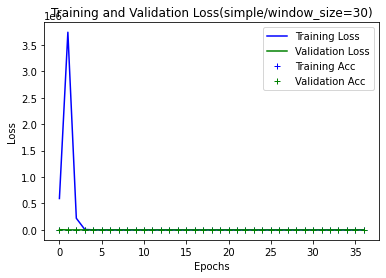

In [79]:
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(simple/window_size=30)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

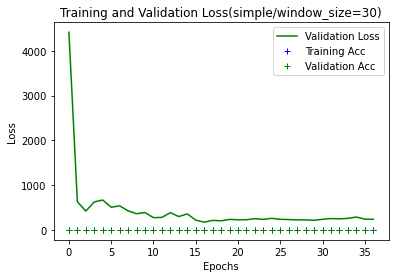

In [81]:
epochs = range(len(loss_values))
#plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(simple/window_size=30)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

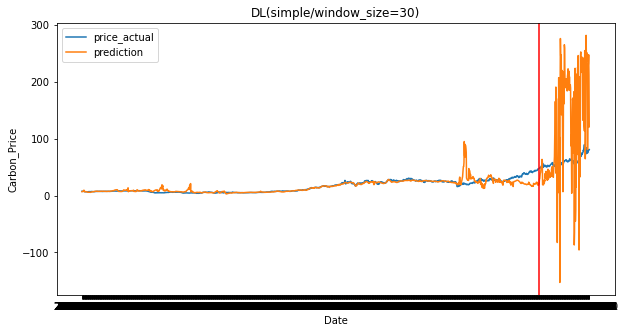

In [80]:
x_pred = model.predict(x_3d)
df_x_pred = pd.DataFrame(x_pred, index = df.index[30:])
df_y = pd.DataFrame(y, index=df.index[30:])
plt.figure(figsize = (10,5))

plt.plot(df_y, label = 'price_actual')
plt.plot(df_x_pred, label = 'prediction')
plt.axvline(df_x_pred.index[x_train.shape[0]], color = 'red', ls='-')

plt.title('DL(simple/window_size=30)')

plt.xlabel('Date')
plt.ylabel('Carbon_Price')

plt.legend()
plt.show()

### add window size=7
- window size = 5: show contradiction pattern in sharp increase in recent trends
- window size =30: almost not learning, much more time and memory need fro learning
- window size =10: roughly followed the pattern but overshooting in recent increasing period.


In [82]:
def split_xy5(dataset, time_steps):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        
        if x_end_number > len(dataset)-1:
            break
        tmp_x = dataset.iloc[i:x_end_number, :]
        tmp_y = dataset.iloc[x_end_number, 18]
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

x, y = split_xy5(df, 7)

print(x[0,:], y[0])
print(x.shape, y.shape)

[[1.193400e+00 2.748000e+02 3.023140e+03 9.473160e+03 6.417160e+03
  4.111360e+03 3.350520e+03 8.378400e+03 4.751700e+04 1.915750e+03
  1.750165e+04 2.793000e+00 3.290000e+02 1.662200e+02 4.060000e+02
  5.890000e+02 4.991000e+01 2.882000e+00 6.900000e+00 0.000000e+00
  5.499000e+04 7.746000e+07 1.055400e+08 7.505200e+08 1.378900e+08
  5.314000e+10 1.181600e+08 3.870000e+06 3.134400e+08 1.161600e+08
  3.300000e+02 1.900000e+02 1.654000e+04 1.403900e+05 4.508000e+04
  0.000000e+00 1.417800e+05 9.000000e+01]
 [1.188900e+00 2.823000e+02 3.007910e+03 9.469660e+03 6.366510e+03
  4.083500e+03 3.351450e+03 8.127350e+03 4.800100e+04 1.882450e+03
  1.737164e+04 2.804000e+00 3.197000e+02 1.660300e+02 4.050000e+02
  5.917500e+02 4.803000e+01 2.938000e+00 6.770000e+00 0.000000e+00
  2.194000e+04 6.702000e+07 9.681000e+07 7.932600e+08 1.308100e+08
  5.017000e+10 1.728000e+08 4.560000e+06 3.036900e+08 1.018700e+08
  3.100000e+02 2.000000e+02 3.120000e+04 1.383100e+05 5.246000e+04
  0.000000e+00 1.113

In [83]:
tt_split = int(len(x)*0.9)
x_train= x[:tt_split]
y_train= y[:tt_split]

x_test = x[tt_split:]
y_test = y[tt_split:]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1636, 7, 38) (1636,) (182, 7, 38) (182,)


In [84]:
x_train2d = np.reshape(x_train, (-1, x.shape[1]*x.shape[2]))
x_test2d = np.reshape(x_test, (-1, x.shape[1]*x.shape[2]))
x_2d = np.reshape(x,(-1, x.shape[1]*x.shape[2]))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train2d)
x_train2d_scaled = scaler.transform(x_train2d)
x_test2d_scaled = scaler.transform(x_test2d)
x_2d_scaled = scaler.transform(x_2d)

x_train3d = x_train2d_scaled.reshape(-1, x.shape[1], x.shape[2]) 
x_test3d = x_test2d_scaled.reshape(-1, x.shape[1], x.shape[2])  
x_3d = x_2d_scaled.reshape(-1, x.shape[1], x.shape[2]) 
print(x_train3d[0,:])

[[ 1.30683796e+00 -6.73458051e-01 -1.27392629e+00 -1.92650408e+00
  -8.16134146e-01 -2.03213508e+00  4.62455500e-01 -9.64454014e-01
  -1.31124520e+00 -1.04582440e+00 -1.25875487e+00  6.54727082e-02
  -4.79316182e-01  2.99122222e+00  6.81852056e-01  1.58601885e+00
   2.01376021e-03  4.55091332e-01 -8.56298481e-01  0.00000000e+00
  -3.44855137e-01  1.60646691e+00  2.99269972e-01 -2.30947967e-01
   9.61235971e-01  2.35230150e+00 -9.95413340e-01 -4.44872850e-01
  -6.77949390e-01 -1.05265210e+00 -1.63900833e-01 -7.21081783e-01
   2.30063986e-01  6.55217732e-03 -1.86069109e-01  0.00000000e+00
  -2.30175758e-02 -4.96791790e-01]
 [ 1.20682988e+00 -6.70121916e-01 -1.33281669e+00 -1.92988315e+00
  -9.05396792e-01 -2.09262533e+00  4.64760757e-01 -1.10586421e+00
  -1.29118273e+00 -1.16650931e+00 -1.28901824e+00  8.94872721e-02
  -5.35214145e-01  2.98890718e+00  6.52666633e-01  1.62989329e+00
  -1.42830050e-01  5.68658833e-01 -8.69514153e-01  0.00000000e+00
  -3.70090277e-01  1.06989012e+00  5.3387

In [85]:
from keras.models import Sequential, Input
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, 
               input_shape=(x_3d.shape[1], x_3d.shape[2])))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_63 (LSTM)               (None, 7, 128)            85504     
_________________________________________________________________
lstm_64 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
lstm_65 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
lstm_66 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
lstm_67 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
lstm_68 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_22 (Dense)             (None, 32)              

In [86]:
epoch = 100
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),\
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(x_train3d, y_train, verbose=1,
         batch_size = 20, epochs = epoch, validation_split=0.11, callbacks= callbacks)

model = keras.models.load_model('best_model.h5')
score_train = model.evaluate(x_train3d, y_train, verbose=0)
score_test = model.evaluate(x_test3d, y_test, verbose=0)
print('train_score')                    
print("%.2f%%" % (score_train[1]*100))
print('test_score')
print("%.2f%%" % (score_test[1]*100))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print('min_loss_values:', np.min(loss_values))
print('min_loss_values_val:', np.min(val_loss_values))

Epoch 1/100
73/73 [==============================] - 12s 55ms/step - loss: 106.1564 - accuracy: 0.0000e+00 - val_loss: 133.0998 - val_accuracy: 0.0000e+00
Epoch 2/100
73/73 [==============================] - 4s 48ms/step - loss: 4.4341 - accuracy: 0.0000e+00 - val_loss: 34.1548 - val_accuracy: 0.0000e+00
Epoch 3/100
73/73 [==============================] - 4s 49ms/step - loss: 2.2223 - accuracy: 0.0000e+00 - val_loss: 32.8295 - val_accuracy: 0.0000e+00
Epoch 4/100
73/73 [==============================] - 3s 46ms/step - loss: 1.8552 - accuracy: 0.0000e+00 - val_loss: 28.6774 - val_accuracy: 0.0000e+00
Epoch 5/100
73/73 [==============================] - 3s 45ms/step - loss: 1.5485 - accuracy: 0.0000e+00 - val_loss: 36.6336 - val_accuracy: 0.0000e+00
Epoch 6/100
73/73 [==============================] - 3s 46ms/step - loss: 0.9356 - accuracy: 0.0000e+00 - val_loss: 34.1935 - val_accuracy: 0.0000e+00
Epoch 7/100
73/73 [==============================] - 3s 42ms/step - loss: 1.3060 - accurac

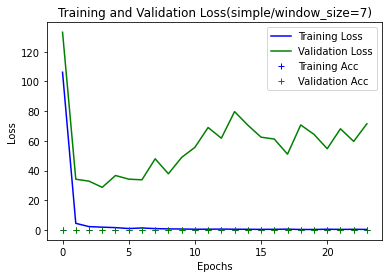

In [90]:
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(simple/window_size=7)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

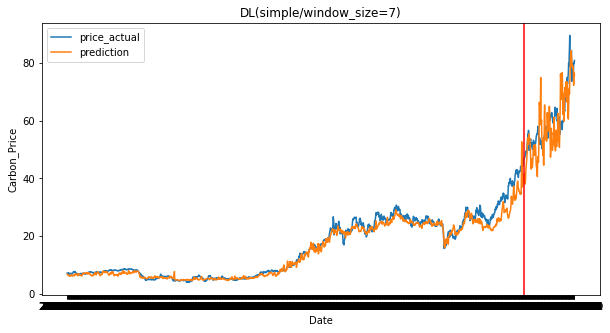

In [91]:
x_pred = model.predict(x_3d)
df_x_pred = pd.DataFrame(x_pred, index = df.index[7:])
df_y = pd.DataFrame(y, index=df.index[7:])
plt.figure(figsize = (10,5))

plt.plot(df_y, label = 'price_actual')
plt.plot(df_x_pred, label = 'prediction')
plt.axvline(df_x_pred.index[x_train.shape[0]], color = 'red', ls='-')

plt.title('DL(simple/window_size=7)')

plt.xlabel('Date')
plt.ylabel('Carbon_Price')

plt.legend()
plt.show()

- In window size=7, the predict line follow the actual trend but, the layers and learn style need to be finely adjusted
### the target window sizes =5, 7

In [ ]:
# ### 0.1. Enhanced model

In [ ]:
# window_size =7

In [92]:
x.shape

(1818, 7, 38)

In [ ]:
# reduced batchsize (20=>10)

In [93]:
epoch = 100
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),\
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(x_train3d, y_train, verbose=1,
         batch_size = 10, epochs = epoch, validation_split=0.11, callbacks= callbacks)

model = keras.models.load_model('best_model.h5')
score_train = model.evaluate(x_train3d, y_train, verbose=0)
score_test = model.evaluate(x_test3d, y_test, verbose=0)
print('train_score')                    
print("%.2f%%" % (score_train[1]*100))
print('test_score')
print("%.2f%%" % (score_test[1]*100))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print('min_loss_values:', np.min(loss_values))
print('min_loss_values_val:', np.min(val_loss_values))

Epoch 1/100
146/146 [==============================] - 11s 44ms/step - loss: 1.7856 - accuracy: 0.0000e+00 - val_loss: 35.3543 - val_accuracy: 0.0000e+00
Epoch 2/100
146/146 [==============================] - 6s 39ms/step - loss: 1.3630 - accuracy: 0.0000e+00 - val_loss: 33.0203 - val_accuracy: 0.0000e+00
Epoch 3/100
146/146 [==============================] - 5s 31ms/step - loss: 0.9082 - accuracy: 0.0000e+00 - val_loss: 42.2486 - val_accuracy: 0.0000e+00
Epoch 4/100
146/146 [==============================] - 5s 31ms/step - loss: 1.0201 - accuracy: 0.0000e+00 - val_loss: 58.6713 - val_accuracy: 0.0000e+00
Epoch 5/100
146/146 [==============================] - 5s 37ms/step - loss: 0.9811 - accuracy: 0.0000e+00 - val_loss: 35.7781 - val_accuracy: 0.0000e+00
Epoch 6/100
146/146 [==============================] - 6s 40ms/step - loss: 0.8849 - accuracy: 0.0000e+00 - val_loss: 61.8778 - val_accuracy: 0.0000e+00
Epoch 7/100
146/146 [==============================] - 6s 40ms/step - loss: 0.530

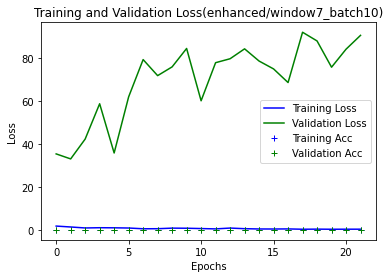

In [94]:
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(enhanced/window7_batch10)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

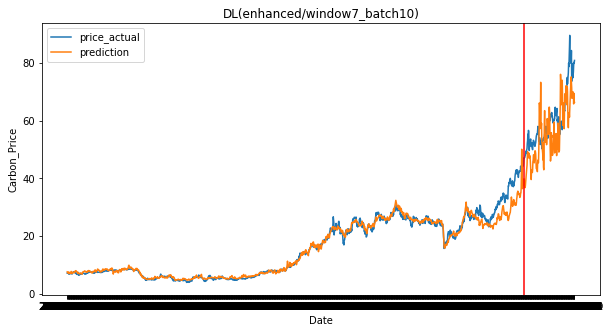

In [95]:
x_pred = model.predict(x_3d)
df_x_pred = pd.DataFrame(x_pred, index = df.index[7:])
df_y = pd.DataFrame(y, index=df.index[7:])
plt.figure(figsize = (10,5))

plt.plot(df_y, label = 'price_actual')
plt.plot(df_x_pred, label = 'prediction')
plt.axvline(df_x_pred.index[x_train.shape[0]], color = 'red', ls='-')

plt.title('DL(enhanced/window7_batch10)')

plt.xlabel('Date')
plt.ylabel('Carbon_Price')

plt.legend()
plt.show()

In [ ]:
# increased batchsize (20=>40)

In [96]:
epoch = 100
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),\
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(x_train3d, y_train, verbose=1,
         batch_size = 40, epochs = epoch, validation_split=0.11, callbacks= callbacks)

model = keras.models.load_model('best_model.h5')
score_train = model.evaluate(x_train3d, y_train, verbose=0)
score_test = model.evaluate(x_test3d, y_test, verbose=0)
print('train_score')                    
print("%.2f%%" % (score_train[1]*100))
print('test_score')
print("%.2f%%" % (score_test[1]*100))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print('min_loss_values:', np.min(loss_values))
print('min_loss_values_val:', np.min(val_loss_values))

Epoch 1/100
37/37 [==============================] - 6s 46ms/step - loss: 0.6016 - accuracy: 0.0000e+00 - val_loss: 42.4091 - val_accuracy: 0.0000e+00
Epoch 2/100
37/37 [==============================] - 2s 45ms/step - loss: 0.5301 - accuracy: 0.0000e+00 - val_loss: 52.4320 - val_accuracy: 0.0000e+00
Epoch 3/100
37/37 [==============================] - 2s 46ms/step - loss: 0.5333 - accuracy: 0.0000e+00 - val_loss: 42.1596 - val_accuracy: 0.0000e+00
Epoch 4/100
37/37 [==============================] - 2s 47ms/step - loss: 0.5116 - accuracy: 0.0000e+00 - val_loss: 55.2467 - val_accuracy: 0.0000e+00
Epoch 5/100
37/37 [==============================] - 2s 50ms/step - loss: 0.5242 - accuracy: 0.0000e+00 - val_loss: 47.0796 - val_accuracy: 0.0000e+00
Epoch 6/100
37/37 [==============================] - 2s 55ms/step - loss: 0.4424 - accuracy: 0.0000e+00 - val_loss: 57.5613 - val_accuracy: 0.0000e+00
Epoch 7/100
37/37 [==============================] - 2s 59ms/step - loss: 0.3930 - accuracy: 0

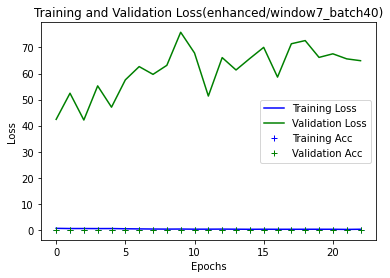

In [97]:
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(enhanced/window7_batch40)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

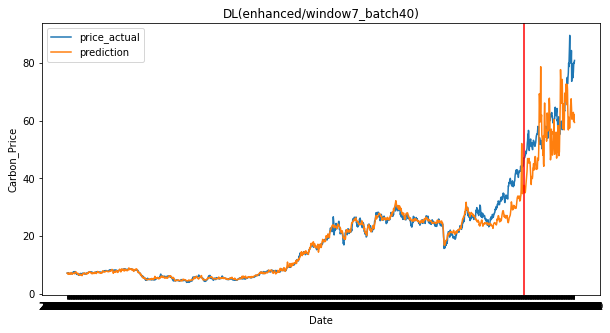

In [98]:
x_pred = model.predict(x_3d)
df_x_pred = pd.DataFrame(x_pred, index = df.index[7:])
df_y = pd.DataFrame(y, index=df.index[7:])
plt.figure(figsize = (10,5))

plt.plot(df_y, label = 'price_actual')
plt.plot(df_x_pred, label = 'prediction')
plt.axvline(df_x_pred.index[x_train.shape[0]], color = 'red', ls='-')

plt.title('DL(enhanced/window7_batch40)')

plt.xlabel('Date')
plt.ylabel('Carbon_Price')

plt.legend()
plt.show()

- batch size10(loss/val_loss: 0.31/33), 20(0.29/28),40(0.19/42)
### For the window=7, thus, layer adjust will be done with bath size = 20

In [ ]:
# window_size =7

In [99]:
def split_xy5(dataset, time_steps):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        
        if x_end_number > len(dataset)-1:
            break
        tmp_x = dataset.iloc[i:x_end_number, :]
        tmp_y = dataset.iloc[x_end_number, 18]
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

x, y = split_xy5(df, 5)

print(x[0,:], y[0])
print(x.shape, y.shape)

[[1.193400e+00 2.748000e+02 3.023140e+03 9.473160e+03 6.417160e+03
  4.111360e+03 3.350520e+03 8.378400e+03 4.751700e+04 1.915750e+03
  1.750165e+04 2.793000e+00 3.290000e+02 1.662200e+02 4.060000e+02
  5.890000e+02 4.991000e+01 2.882000e+00 6.900000e+00 0.000000e+00
  5.499000e+04 7.746000e+07 1.055400e+08 7.505200e+08 1.378900e+08
  5.314000e+10 1.181600e+08 3.870000e+06 3.134400e+08 1.161600e+08
  3.300000e+02 1.900000e+02 1.654000e+04 1.403900e+05 4.508000e+04
  0.000000e+00 1.417800e+05 9.000000e+01]
 [1.188900e+00 2.823000e+02 3.007910e+03 9.469660e+03 6.366510e+03
  4.083500e+03 3.351450e+03 8.127350e+03 4.800100e+04 1.882450e+03
  1.737164e+04 2.804000e+00 3.197000e+02 1.660300e+02 4.050000e+02
  5.917500e+02 4.803000e+01 2.938000e+00 6.770000e+00 0.000000e+00
  2.194000e+04 6.702000e+07 9.681000e+07 7.932600e+08 1.308100e+08
  5.017000e+10 1.728000e+08 4.560000e+06 3.036900e+08 1.018700e+08
  3.100000e+02 2.000000e+02 3.120000e+04 1.383100e+05 5.246000e+04
  0.000000e+00 1.113

In [100]:
tt_split = int(len(x)*0.9)
x_train= x[:tt_split]
y_train= y[:tt_split]

x_test = x[tt_split:]
y_test = y[tt_split:]

In [101]:
x_train2d = np.reshape(x_train, (-1, x.shape[1]*x.shape[2]))
x_test2d = np.reshape(x_test, (-1, x.shape[1]*x.shape[2]))
x_2d = np.reshape(x,(-1, x.shape[1]*x.shape[2]))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train2d)
x_train2d_scaled = scaler.transform(x_train2d)
x_test2d_scaled = scaler.transform(x_test2d)
x_2d_scaled = scaler.transform(x_2d)

x_train3d = x_train2d_scaled.reshape(-1, x.shape[1], x.shape[2]) 
x_test3d = x_test2d_scaled.reshape(-1, x.shape[1], x.shape[2])  
x_3d = x_2d_scaled.reshape(-1, x.shape[1], x.shape[2]) 

In [ ]:
# reduced batch size(20=>10)

In [103]:
from keras.models import Sequential, Input
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, 
               input_shape=(x_3d.shape[1], x_3d.shape[2])))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_69 (LSTM)               (None, 5, 128)            85504     
_________________________________________________________________
lstm_70 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
lstm_71 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
lstm_72 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
lstm_73 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
lstm_74 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_24 (Dense)             (None, 32)              

In [104]:
epoch = 100
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),\
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(x_train3d, y_train, verbose=1,
         batch_size = 10, epochs = epoch, validation_split=0.11, callbacks= callbacks)

model = keras.models.load_model('best_model.h5')
score_train = model.evaluate(x_train3d, y_train, verbose=0)
score_test = model.evaluate(x_test3d, y_test, verbose=0)
print('train_score')                    
print("%.2f%%" % (score_train[1]*100))
print('test_score')
print("%.2f%%" % (score_test[1]*100))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print('min_loss_values:', np.min(loss_values))
print('min_loss_values_val:', np.min(val_loss_values))

Epoch 1/100
146/146 [==============================] - 13s 38ms/step - loss: 128.7980 - accuracy: 0.0000e+00 - val_loss: 186.4968 - val_accuracy: 0.0000e+00
Epoch 2/100
146/146 [==============================] - 5s 33ms/step - loss: 3.8636 - accuracy: 0.0000e+00 - val_loss: 110.3942 - val_accuracy: 0.0000e+00
Epoch 3/100
146/146 [==============================] - 4s 28ms/step - loss: 2.2829 - accuracy: 0.0000e+00 - val_loss: 88.8845 - val_accuracy: 0.0000e+00
Epoch 4/100
146/146 [==============================] - 4s 29ms/step - loss: 1.3669 - accuracy: 0.0000e+00 - val_loss: 86.3530 - val_accuracy: 0.0000e+00
Epoch 5/100
146/146 [==============================] - 4s 27ms/step - loss: 1.0505 - accuracy: 0.0000e+00 - val_loss: 74.0939 - val_accuracy: 0.0000e+00
Epoch 6/100
146/146 [==============================] - 4s 25ms/step - loss: 0.7890 - accuracy: 0.0000e+00 - val_loss: 75.7247 - val_accuracy: 0.0000e+00
Epoch 7/100
146/146 [==============================] - 5s 33ms/step - loss: 0

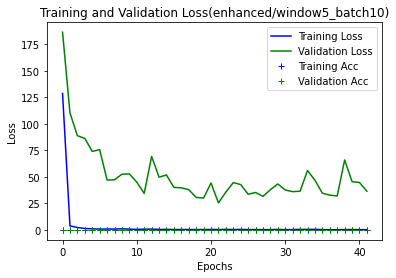

In [105]:
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(enhanced/window5_batch10)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

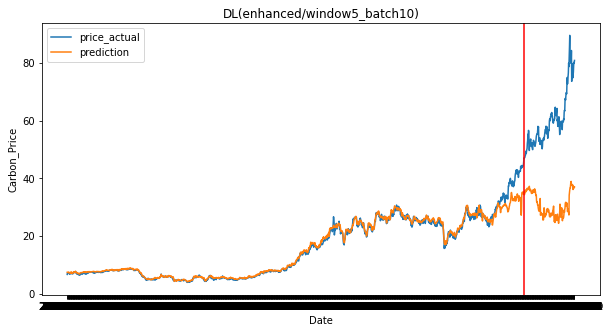

In [106]:
x_pred = model.predict(x_3d)
df_x_pred = pd.DataFrame(x_pred, index = df.index[5:])
df_y = pd.DataFrame(y, index=df.index[5:])
plt.figure(figsize = (10,5))

plt.plot(df_y, label = 'price_actual')
plt.plot(df_x_pred, label = 'prediction')
plt.axvline(df_x_pred.index[x_train.shape[0]], color = 'red', ls='-')

plt.title('DL(enhanced/window5_batch10)')

plt.xlabel('Date')
plt.ylabel('Carbon_Price')

plt.legend()
plt.show()

- val_loss is higer than batch size=20(loss/val_loss:0.32/20)
- recent shooting pattern is not predicted

In [ ]:
# increased batchsize (20=>40)

In [107]:
epoch = 100
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),\
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(x_train3d, y_train, verbose=1,
         batch_size = 40, epochs = epoch, validation_split=0.11, callbacks= callbacks)

model = keras.models.load_model('best_model.h5')
score_train = model.evaluate(x_train3d, y_train, verbose=0)
score_test = model.evaluate(x_test3d, y_test, verbose=0)
print('train_score')                    
print("%.2f%%" % (score_train[1]*100))
print('test_score')
print("%.2f%%" % (score_test[1]*100))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print('min_loss_values:', np.min(loss_values))
print('min_loss_values_val:', np.min(val_loss_values))

Epoch 1/100
37/37 [==============================] - 6s 36ms/step - loss: 0.4068 - accuracy: 0.0000e+00 - val_loss: 34.9996 - val_accuracy: 0.0000e+00
Epoch 2/100
37/37 [==============================] - 2s 51ms/step - loss: 0.1719 - accuracy: 0.0000e+00 - val_loss: 32.1600 - val_accuracy: 0.0000e+00
Epoch 3/100
37/37 [==============================] - 2s 46ms/step - loss: 0.1541 - accuracy: 0.0000e+00 - val_loss: 28.8447 - val_accuracy: 0.0000e+00
Epoch 4/100
37/37 [==============================] - 1s 37ms/step - loss: 0.1607 - accuracy: 0.0000e+00 - val_loss: 35.9822 - val_accuracy: 0.0000e+00
Epoch 5/100
37/37 [==============================] - 1s 36ms/step - loss: 0.1609 - accuracy: 0.0000e+00 - val_loss: 33.7718 - val_accuracy: 0.0000e+00
Epoch 6/100
37/37 [==============================] - 1s 36ms/step - loss: 0.1372 - accuracy: 0.0000e+00 - val_loss: 29.6030 - val_accuracy: 0.0000e+00
Epoch 7/100
37/37 [==============================] - 1s 36ms/step - loss: 0.1338 - accuracy: 0

Epoch 55/100
37/37 [==============================] - 2s 56ms/step - loss: 0.0809 - accuracy: 0.0000e+00 - val_loss: 24.9398 - val_accuracy: 0.0000e+00
Epoch 56/100
37/37 [==============================] - 2s 51ms/step - loss: 0.1199 - accuracy: 0.0000e+00 - val_loss: 31.2227 - val_accuracy: 0.0000e+00
Epoch 57/100
37/37 [==============================] - 2s 52ms/step - loss: 0.1370 - accuracy: 0.0000e+00 - val_loss: 24.4827 - val_accuracy: 0.0000e+00
Epoch 58/100
37/37 [==============================] - 2s 59ms/step - loss: 0.0822 - accuracy: 0.0000e+00 - val_loss: 30.6091 - val_accuracy: 0.0000e+00
Epoch 59/100
37/37 [==============================] - 2s 59ms/step - loss: 0.0791 - accuracy: 0.0000e+00 - val_loss: 28.3904 - val_accuracy: 0.0000e+00
Epoch 60/100
37/37 [==============================] - 2s 46ms/step - loss: 0.0756 - accuracy: 0.0000e+00 - val_loss: 30.1011 - val_accuracy: 0.0000e+00
Epoch 61/100
37/37 [==============================] - 2s 42ms/step - loss: 0.0738 - accu

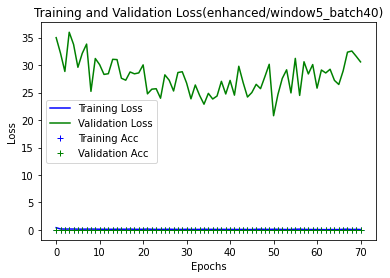

In [108]:
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(enhanced/window5_batch40)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

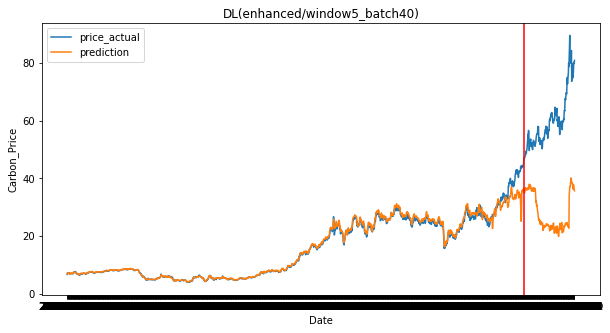

In [109]:
x_pred = model.predict(x_3d)
df_x_pred = pd.DataFrame(x_pred, index = df.index[5:])
df_y = pd.DataFrame(y, index=df.index[5:])
plt.figure(figsize = (10,5))

plt.plot(df_y, label = 'price_actual')
plt.plot(df_x_pred, label = 'prediction')
plt.axvline(df_x_pred.index[x_train.shape[0]], color = 'red', ls='-')

plt.title('DL(enhanced/window5_batch40)')

plt.xlabel('Date')
plt.ylabel('Carbon_Price')

plt.legend()
plt.show()

- not predict recent increasing periods
- windsow_size=5 seems too short to predict when target figure is over the traing limit

## thus, window size =5 is dropped in further step

In [ ]:
# window_size =7, batch size=20

In [110]:
def split_xy5(dataset, time_steps):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        
        if x_end_number > len(dataset)-1:
            break
        tmp_x = dataset.iloc[i:x_end_number, :]
        tmp_y = dataset.iloc[x_end_number, 18]
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

x, y = split_xy5(df, 7)

In [111]:
tt_split = int(len(x)*0.9)
x_train= x[:tt_split]
y_train= y[:tt_split]

x_test = x[tt_split:]
y_test = y[tt_split:]

In [112]:
x_train2d = np.reshape(x_train, (-1, x.shape[1]*x.shape[2]))
x_test2d = np.reshape(x_test, (-1, x.shape[1]*x.shape[2]))
x_2d = np.reshape(x,(-1, x.shape[1]*x.shape[2]))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train2d)
x_train2d_scaled = scaler.transform(x_train2d)
x_test2d_scaled = scaler.transform(x_test2d)
x_2d_scaled = scaler.transform(x_2d)

x_train3d = x_train2d_scaled.reshape(-1, x.shape[1], x.shape[2]) 
x_test3d = x_test2d_scaled.reshape(-1, x.shape[1], x.shape[2])  
x_3d = x_2d_scaled.reshape(-1, x.shape[1], x.shape[2]) 

In [ ]:
# - 0.1.1 Layer adjusted

In [ ]:
# simplified model

In [113]:
from keras.models import Sequential, Input
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, 
               input_shape=(x_3d.shape[1], x_3d.shape[2])))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_75 (LSTM)               (None, 7, 128)            85504     
_________________________________________________________________
lstm_76 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
lstm_77 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_26 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 33        
Total params: 352,833
Trainable params: 352,833
Non-trainable params: 0
_________________________________________________________________


In [114]:
epoch = 100
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),\
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(x_train3d, y_train, verbose=1,
         batch_size = 20, epochs = epoch, validation_split=0.11, callbacks= callbacks)

model = keras.models.load_model('best_model.h5')
score_train = model.evaluate(x_train3d, y_train, verbose=0)
score_test = model.evaluate(x_test3d, y_test, verbose=0)
print('train_score')                    
print("%.2f%%" % (score_train[1]*100))
print('test_score')
print("%.2f%%" % (score_test[1]*100))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print('min_loss_values:', np.min(loss_values))
print('min_loss_values_val:', np.min(val_loss_values))

Epoch 1/100
73/73 [==============================] - 6s 29ms/step - loss: 64.2510 - accuracy: 0.0000e+00 - val_loss: 39.1960 - val_accuracy: 0.0000e+00
Epoch 2/100
73/73 [==============================] - 2s 22ms/step - loss: 2.8962 - accuracy: 0.0000e+00 - val_loss: 55.6537 - val_accuracy: 0.0000e+00
Epoch 3/100
73/73 [==============================] - 2s 22ms/step - loss: 2.1059 - accuracy: 0.0000e+00 - val_loss: 39.7547 - val_accuracy: 0.0000e+00
Epoch 4/100
73/73 [==============================] - 1s 20ms/step - loss: 1.0934 - accuracy: 0.0000e+00 - val_loss: 42.0755 - val_accuracy: 0.0000e+00
Epoch 5/100
73/73 [==============================] - 1s 20ms/step - loss: 0.7214 - accuracy: 0.0000e+00 - val_loss: 70.2350 - val_accuracy: 0.0000e+00
Epoch 6/100
73/73 [==============================] - 2s 28ms/step - loss: 0.5655 - accuracy: 0.0000e+00 - val_loss: 57.2164 - val_accuracy: 0.0000e+00
Epoch 7/100
73/73 [==============================] - 2s 24ms/step - loss: 0.5801 - accuracy: 

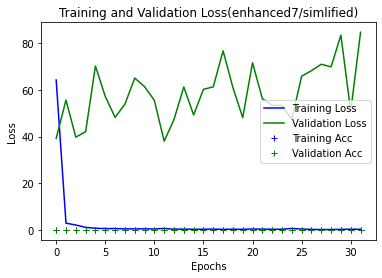

In [115]:
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(enhanced7/simlified)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

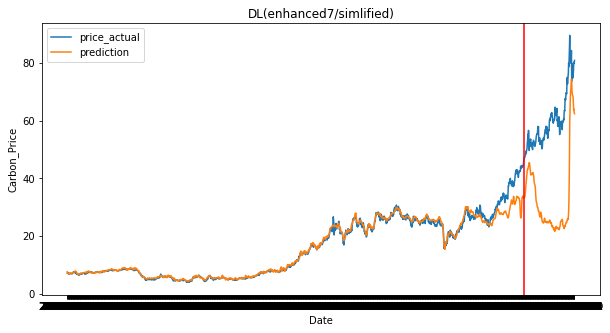

In [116]:
x_pred = model.predict(x_3d)
df_x_pred = pd.DataFrame(x_pred, index = df.index[7:])
df_y = pd.DataFrame(y, index=df.index[7:])
plt.figure(figsize = (10,5))

plt.plot(df_y, label = 'price_actual')
plt.plot(df_x_pred, label = 'prediction')
plt.axvline(df_x_pred.index[x_train.shape[0]], color = 'red', ls='-')

plt.title('DL(enhanced7/simlified)')

plt.xlabel('Date')
plt.ylabel('Carbon_Price')

plt.legend()
plt.show()

- not follow the recent increase

In [ ]:
# the original model with 1 dropout layer 

In [117]:
from keras.models import Sequential, Input
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, 
               input_shape=(x_3d.shape[1], x_3d.shape[2])))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_78 (LSTM)               (None, 7, 128)            85504     
_________________________________________________________________
lstm_79 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
lstm_80 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
lstm_81 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
lstm_82 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
lstm_83 (LSTM)               (None, 128)             

In [118]:
epoch = 100
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),\
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(x_train3d, y_train, verbose=1,
         batch_size = 20, epochs = epoch, validation_split=0.11, callbacks= callbacks)

model = keras.models.load_model('best_model.h5')
score_train = model.evaluate(x_train3d, y_train, verbose=0)
score_test = model.evaluate(x_test3d, y_test, verbose=0)
print('train_score')                    
print("%.2f%%" % (score_train[1]*100))
print('test_score')
print("%.2f%%" % (score_test[1]*100))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print('min_loss_values:', np.min(loss_values))
print('min_loss_values_val:', np.min(val_loss_values))

Epoch 1/100
73/73 [==============================] - 12s 54ms/step - loss: 159.1269 - accuracy: 0.0000e+00 - val_loss: 64.3864 - val_accuracy: 0.0000e+00
Epoch 2/100
73/73 [==============================] - 3s 43ms/step - loss: 8.6543 - accuracy: 0.0000e+00 - val_loss: 24.0052 - val_accuracy: 0.0000e+00
Epoch 3/100
73/73 [==============================] - 3s 40ms/step - loss: 4.0866 - accuracy: 0.0000e+00 - val_loss: 36.5588 - val_accuracy: 0.0000e+00
Epoch 4/100
73/73 [==============================] - 3s 37ms/step - loss: 2.6953 - accuracy: 0.0000e+00 - val_loss: 60.1096 - val_accuracy: 0.0000e+00
Epoch 5/100
73/73 [==============================] - 4s 48ms/step - loss: 1.9920 - accuracy: 0.0000e+00 - val_loss: 38.6584 - val_accuracy: 0.0000e+00
Epoch 6/100
73/73 [==============================] - 4s 49ms/step - loss: 1.5690 - accuracy: 0.0000e+00 - val_loss: 71.7330 - val_accuracy: 0.0000e+00
Epoch 7/100
73/73 [==============================] - 4s 49ms/step - loss: 1.5317 - accuracy

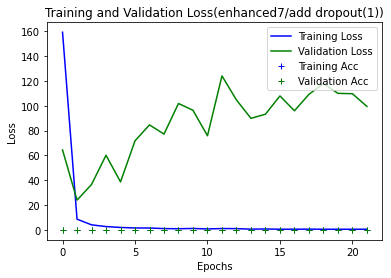

In [119]:
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(enhanced7/add dropout(1))')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

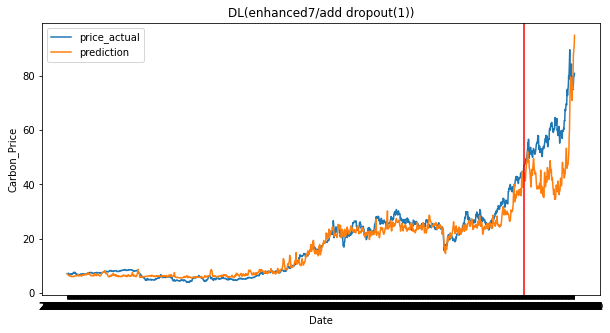

In [120]:
x_pred = model.predict(x_3d)
df_x_pred = pd.DataFrame(x_pred, index = df.index[7:])
df_y = pd.DataFrame(y, index=df.index[7:])
plt.figure(figsize = (10,5))

plt.plot(df_y, label = 'price_actual')
plt.plot(df_x_pred, label = 'prediction')
plt.axvline(df_x_pred.index[x_train.shape[0]], color = 'red', ls='-')

plt.title('DL(enhanced7/add dropout(1))')

plt.xlabel('Date')
plt.ylabel('Carbon_Price')

plt.legend()
plt.show()

- a bit following the recent trends
- trainging is a bit rought

In [ ]:
# the original model with 2 dropout layer 

In [121]:
from keras.models import Sequential, Input
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, 
               input_shape=(x_3d.shape[1], x_3d.shape[2])))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, activation='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_84 (LSTM)               (None, 7, 128)            85504     
_________________________________________________________________
lstm_85 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
lstm_86 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
lstm_87 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
lstm_88 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 128)          

In [122]:
epoch = 100
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),\
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(x_train3d, y_train, verbose=1,
         batch_size = 20, epochs = epoch, validation_split=0.11, callbacks= callbacks)

model = keras.models.load_model('best_model.h5')
score_train = model.evaluate(x_train3d, y_train, verbose=0)
score_test = model.evaluate(x_test3d, y_test, verbose=0)
print('train_score')                    
print("%.2f%%" % (score_train[1]*100))
print('test_score')
print("%.2f%%" % (score_test[1]*100))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print('min_loss_values:', np.min(loss_values))
print('min_loss_values_val:', np.min(val_loss_values))

Epoch 1/100
73/73 [==============================] - 10s 52ms/step - loss: 117.0668 - accuracy: 0.0000e+00 - val_loss: 286.6910 - val_accuracy: 0.0000e+00
Epoch 2/100
73/73 [==============================] - 4s 56ms/step - loss: 9.9803 - accuracy: 0.0000e+00 - val_loss: 68.3244 - val_accuracy: 0.0000e+00
Epoch 3/100
73/73 [==============================] - 4s 50ms/step - loss: 4.8660 - accuracy: 0.0000e+00 - val_loss: 85.7804 - val_accuracy: 0.0000e+00
Epoch 4/100
73/73 [==============================] - 3s 47ms/step - loss: 3.5878 - accuracy: 0.0000e+00 - val_loss: 109.1459 - val_accuracy: 0.0000e+00
Epoch 5/100
73/73 [==============================] - 3s 44ms/step - loss: 3.1132 - accuracy: 0.0000e+00 - val_loss: 112.9566 - val_accuracy: 0.0000e+00
Epoch 6/100
73/73 [==============================] - 3s 42ms/step - loss: 2.6667 - accuracy: 0.0000e+00 - val_loss: 116.4001 - val_accuracy: 0.0000e+00
Epoch 7/100
73/73 [==============================] - 4s 50ms/step - loss: 1.9889 - accu

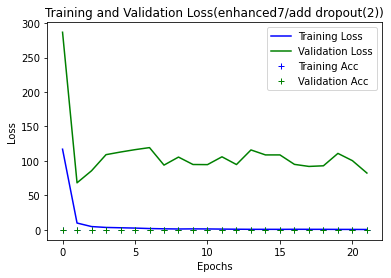

In [123]:
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(enhanced7/add dropout(2))')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

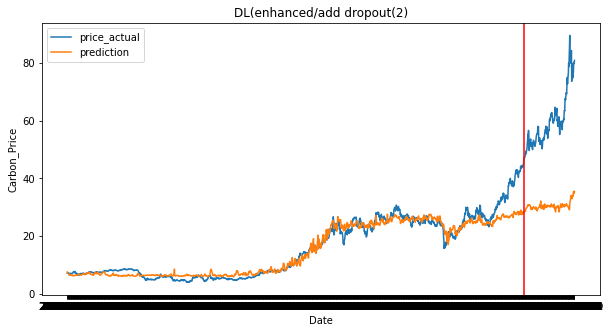

In [125]:
x_pred = model.predict(x_3d)
df_x_pred = pd.DataFrame(x_pred, index = df.index[7:])
df_y = pd.DataFrame(y, index=df.index[7:])
plt.figure(figsize = (10,5))

plt.plot(df_y, label = 'price_actual')
plt.plot(df_x_pred, label = 'prediction')
plt.axvline(df_x_pred.index[x_train.shape[0]], color = 'red', ls='-')

plt.title('DL(enhanced7/add dropout(2)')

plt.xlabel('Date')
plt.ylabel('Carbon_Price')

plt.legend()
plt.show()

- worse than 1 drop out

In [ ]:
# add lstm layer

In [128]:
from keras.models import Sequential, Input
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, 
               input_shape=(x_3d.shape[1], x_3d.shape[2])))
model.add(LSTM(128, activation='tanh',return_sequences=True))
model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(32, activation='tanh',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(16, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_96 (LSTM)               (None, 7, 128)            85504     
_________________________________________________________________
lstm_97 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
lstm_98 (LSTM)               (None, 7, 64)             49408     
_________________________________________________________________
lstm_99 (LSTM)               (None, 7, 128)            98816     
_________________________________________________________________
lstm_100 (LSTM)              (None, 7, 128)            131584    
_________________________________________________________________
lstm_101 (LSTM)              (None, 7, 32)             20608     
_________________________________________________________________
lstm_102 (LSTM)              (None, 7, 128)          

In [129]:
epoch = 100
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),\
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(x_train3d, y_train, verbose=1,
         batch_size = 20, epochs = epoch, validation_split=0.11, callbacks= callbacks)

model = keras.models.load_model('best_model.h5')
score_train = model.evaluate(x_train3d, y_train, verbose=0)
score_test = model.evaluate(x_test3d, y_test, verbose=0)
print('train_score')                    
print("%.2f%%" % (score_train[1]*100))
print('test_score')
print("%.2f%%" % (score_test[1]*100))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print('min_loss_values:', np.min(loss_values))
print('min_loss_values_val:', np.min(val_loss_values))

Epoch 1/100
73/73 [==============================] - 19s 78ms/step - loss: 93.9577 - accuracy: 0.0000e+00 - val_loss: 56.0921 - val_accuracy: 0.0000e+00
Epoch 2/100
73/73 [==============================] - 4s 60ms/step - loss: 4.4529 - accuracy: 0.0000e+00 - val_loss: 29.1134 - val_accuracy: 0.0000e+00
Epoch 3/100
73/73 [==============================] - 4s 57ms/step - loss: 2.3496 - accuracy: 0.0000e+00 - val_loss: 39.1274 - val_accuracy: 0.0000e+00
Epoch 4/100
73/73 [==============================] - 4s 59ms/step - loss: 1.8557 - accuracy: 0.0000e+00 - val_loss: 7.8348 - val_accuracy: 0.0000e+00
Epoch 5/100
73/73 [==============================] - 4s 59ms/step - loss: 1.5518 - accuracy: 0.0000e+00 - val_loss: 35.0431 - val_accuracy: 0.0000e+00
Epoch 6/100
73/73 [==============================] - 5s 73ms/step - loss: 1.2726 - accuracy: 0.0000e+00 - val_loss: 40.4444 - val_accuracy: 0.0000e+00
Epoch 7/100
73/73 [==============================] - 4s 58ms/step - loss: 1.1781 - accuracy: 

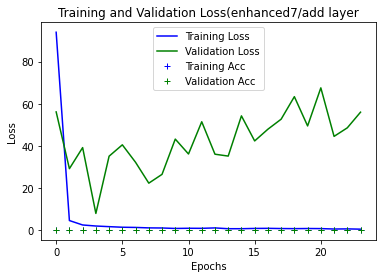

In [130]:
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(enhanced7/add layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

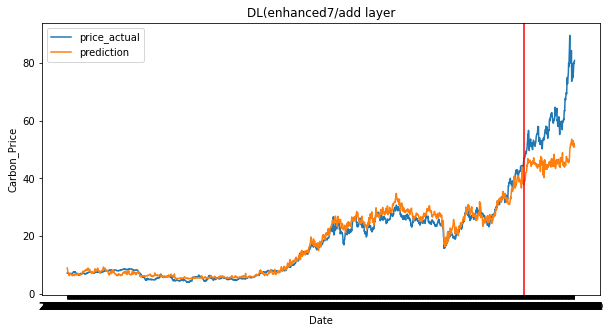

In [131]:
x_pred = model.predict(x_3d)
df_x_pred = pd.DataFrame(x_pred, index = df.index[7:])
df_y = pd.DataFrame(y, index=df.index[7:])
plt.figure(figsize = (10,5))

plt.plot(df_y, label = 'price_actual')
plt.plot(df_x_pred, label = 'prediction')
plt.axvline(df_x_pred.index[x_train.shape[0]], color = 'red', ls='-')

plt.title('DL(enhanced7/add layer')

plt.xlabel('Date')
plt.ylabel('Carbon_Price')

plt.legend()
plt.show()

In [ ]:
# add more layers

In [136]:
from keras.models import Sequential, Input
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, 
               input_shape=(x_3d.shape[1], x_3d.shape[2])))
model.add(LSTM(128, activation='tanh',return_sequences=True))
model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(LSTM(32, activation='tanh',return_sequences=True))
model.add(LSTM(32, activation='tanh',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(32, activation='tanh',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(16, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='tanh',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mse', metrics =['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_116 (LSTM)              (None, 7, 128)            85504     
_________________________________________________________________
lstm_117 (LSTM)              (None, 7, 128)            131584    
_________________________________________________________________
lstm_118 (LSTM)              (None, 7, 64)             49408     
_________________________________________________________________
lstm_119 (LSTM)              (None, 7, 32)             12416     
_________________________________________________________________
lstm_120 (LSTM)              (None, 7, 32)             8320      
_________________________________________________________________
lstm_121 (LSTM)              (None, 7, 128)            82432     
_________________________________________________________________
lstm_122 (LSTM)              (None, 7, 128)          

In [137]:
epoch = 100
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),\
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]

history = model.fit(x_train3d, y_train, verbose=1,
         batch_size = 20, epochs = epoch, validation_split=0.11, callbacks= callbacks)

model = keras.models.load_model('best_model.h5')
score_train = model.evaluate(x_train3d, y_train, verbose=0)
score_test = model.evaluate(x_test3d, y_test, verbose=0)
print('train_score')                    
print("%.2f%%" % (score_train[1]*100))
print('test_score')
print("%.2f%%" % (score_test[1]*100))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
print('min_loss_values:', np.min(loss_values))
print('min_loss_values_val:', np.min(val_loss_values))

Epoch 1/100
73/73 [==============================] - 22s 95ms/step - loss: 125.0859 - accuracy: 0.0000e+00 - val_loss: 18.0886 - val_accuracy: 0.0000e+00
Epoch 2/100
73/73 [==============================] - 5s 65ms/step - loss: 6.6991 - accuracy: 0.0000e+00 - val_loss: 81.9062 - val_accuracy: 0.0000e+00
Epoch 3/100
73/73 [==============================] - 5s 67ms/step - loss: 2.9217 - accuracy: 0.0000e+00 - val_loss: 78.7918 - val_accuracy: 0.0000e+00
Epoch 4/100
73/73 [==============================] - 5s 69ms/step - loss: 2.4005 - accuracy: 0.0000e+00 - val_loss: 86.2524 - val_accuracy: 0.0000e+00
Epoch 5/100
73/73 [==============================] - 5s 69ms/step - loss: 2.2295 - accuracy: 0.0000e+00 - val_loss: 90.8584 - val_accuracy: 0.0000e+00
Epoch 6/100
73/73 [==============================] - 5s 72ms/step - loss: 1.4773 - accuracy: 0.0000e+00 - val_loss: 51.5530 - val_accuracy: 0.0000e+00
Epoch 7/100
73/73 [==============================] - 5s 72ms/step - loss: 1.4963 - accuracy

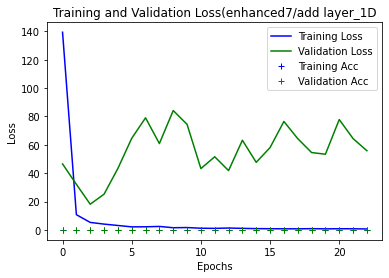

In [134]:
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'b-', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'g-', label = 'Validation Loss')
plt.plot(epochs, acc_values, 'b+', label = 'Training Acc')
plt.plot(epochs, val_acc_values, 'g+', label = 'Validation Acc')
plt.title('Training and Validation Loss(enhanced7/add layer_2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

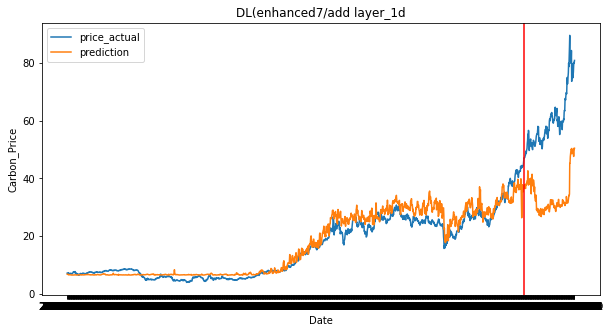

In [135]:
x_pred = model.predict(x_3d)
df_x_pred = pd.DataFrame(x_pred, index = df.index[7:])
df_y = pd.DataFrame(y, index=df.index[7:])
plt.figure(figsize = (10,5))

plt.plot(df_y, label = 'price_actual')
plt.plot(df_x_pred, label = 'prediction')
plt.axvline(df_x_pred.index[x_train.shape[0]], color = 'red', ls='-')

plt.title('DL(enhanced7/add layer_2')

plt.xlabel('Date')
plt.ylabel('Carbon_Price')

plt.legend()
plt.show()